Reproducing some scaling laws results from [Chinchilla](https://arxiv.org/pdf/2203.15556.pdf). Can't get the numbers to match exactly, but can still be used as a rough guide to help determine compute-optimal models. Also contains related utilities for calculating flops and param counts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## params

First some parameter calculations:

In [2]:
def gpt_params(seq_len, vocab_size, d_model, num_heads, num_layers):
    """ Given GPT config calculate total number of parameters """
    ffw_size = 4*d_model # in GPT the number of intermediate features is always 4*d_model
    # token and position embeddings
    embeddings = d_model * vocab_size + d_model * seq_len
    # transformer blocks
    attention = 3*d_model**2 + 3*d_model # weights and biases
    attproj = d_model**2 + d_model
    ffw = d_model*(ffw_size) + ffw_size
    ffwproj = ffw_size*d_model + d_model
    layernorms = 2*2*d_model
    # dense
    ln_f = 2*d_model
    dense = d_model*vocab_size # note: no bias here
    # note: embeddings are not included in the param count!
    total_params = num_layers*(attention + attproj + ffw + ffwproj + layernorms) + ln_f + dense
    return total_params

gpt2 = dict(seq_len = 1024, vocab_size = 50257, d_model = 768, num_heads = 12, num_layers = 12)
gpt_params(**gpt2)/1e6

123.653376

OpenAI reports gpt2 (small) as having 124M params, so this is a match. Also, loading the OpenAI weights into nanoGPT and then calling `model.parameters()` exactly matches the above number and verifies the implementation. Now Chinchilla parameters:

We are almost able to reproduce the parameter counts for the Chinchilla models.

Now turning to FLOPs:

## flops

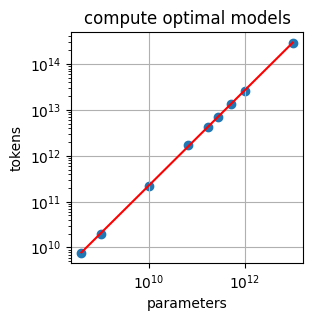

In [14]:
plt.figure(figsize=(3, 3))
# plot the line
plt.plot([q[0] for q in raw], [10**(m*np.log10(q[0]) + c) for q in raw], label='linear regression', color='r')
# plot the raw data
plt.scatter([q[0] for q in raw], [q[1] for q in raw], label='raw data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('parameters')
plt.ylabel('tokens')
plt.title('compute optimal models')
plt.grid()


In [15]:
xquery = 124e6 # query model size here (e.g. GPT-2 small is 124M)
yquery = 10**(m*np.log10(xquery) + c)
print(f"predicted parameters for {xquery:e} tokens: {yquery:e}")

predicted parameters for 1.240000e+08 tokens: 2.292426e+09
